# Geometric Brownian Motion

Geometric Brownian Motion (GBM) is a stochastic process that is widely used in mathematical finance, particularly for modeling stock prices in the Black-Scholes model. This notebook explains the mathematical foundations of GBM and provides Python implementations for simulating GBM paths.

## Mathematical Foundation

A stochastic process $S_t$ follows a Geometric Brownian Motion if it satisfies the following stochastic differential equation (SDE):

$$dS_t = \mu S_t dt + \sigma S_t dW_t$$

Where:
- $S_t$ is the stock price at time $t$
- $\mu$ is the drift (average rate of return) of the process
- $\sigma$ is the volatility (standard deviation of returns) of the process
- $dW_t$ is a Wiener process increment (standard Brownian motion)

The solution to this SDE is:

$$S_t = S_0 \exp\left(\left(\mu - \frac{\sigma^2}{2}\right)t + \sigma W_t\right)$$

Where $S_0$ is the initial value of the process at $t=0$.

## Properties of GBM

1. **Log-normality**: The logarithm of price changes follows a normal distribution.
2. **Continuous paths**: The sample paths are continuous.
3. **Markov property**: The future values depend only on the present value, not on past values.
4. **Independent increments**: Changes over non-overlapping time intervals are independent.
5. **Constant relative volatility**: The standard deviation of returns is proportional to price.

## Implementing GBM in Python

Let's first import the necessary libraries:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

### Method 1: Direct Implementation

We'll implement the GBM directly using the closed-form solution:

In [10]:
def gbm_direct(S0, mu, sigma, T, N, random_seed=None):
    """
    Simulate Geometric Brownian Motion using the direct formula.
    
    Parameters:
    S0 (float): Initial stock price
    mu (float): Drift coefficient (annualized)
    sigma (float): Volatility (annualized)
    T (float): Time horizon in years
    N (int): Number of time steps
    random_seed (int): Seed for random number generator
    
    Returns:
    tuple: Time points and simulated stock prices
    """
    if random_seed is not None:
        np.random.seed(random_seed)
        
    dt = T/N
    t = np.linspace(0, T, N+1)
    W = np.random.standard_normal(size=N+1)
    W = np.cumsum(W) * np.sqrt(dt)  # Scaled cumulative sum
    W[0] = 0
    
    S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)
    
    return t, S

### Method 2: Iterative Implementation

We can also implement GBM by discretizing the stochastic differential equation and iteratively generating the price path:

In [27]:
def gbm_iterative(S0, mu, sigma, T, N, random_seed=None):
    """
    Simulate Geometric Brownian Motion using an iterative method.
    
    Parameters:
    S0 (float): Initial stock price
    mu (float): Drift coefficient (annualized)
    sigma (float): Volatility (annualized)
    T (float): Time horizon in years
    N (int): Number of time steps
    random_seed (int): Seed for random number generator
    
    Returns:
    tuple: Time points and simulated stock prices
    """
    if random_seed is not None:
        np.random.seed(random_seed)
        
    dt = T/N
    t = np.linspace(0, T, N+1)
    
    # Brownian motion increments
    dW = np.random.normal(0, np.sqrt(dt), N)
    
    # Initialize price array
    S = np.zeros(N+1)
    S[0] = S0
    
    # Simulate price path
    for i in range(1, N+1):
        S[i] = S[i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW[i-1])
    
    return t, S

### Simulating Multiple Paths

In practice, we often want to simulate multiple paths to understand the distribution of possible outcomes:

In [32]:
def gbm_multiple_paths(S0, mu, sigma, T, N, M, random_seed=None):
    """
    Simulate multiple paths of Geometric Brownian Motion.
    
    Parameters:
    S0 (float): Initial stock price
    mu (float): Drift coefficient (annualized)
    sigma (float): Volatility (annualized)
    T (float): Time horizon in years
    N (int): Number of time steps
    M (int): Number of paths to simulate
    random_seed (int): Seed for random number generator
    
    Returns:
    tuple: Time points and matrix of simulated stock prices (each column is a path)
    """
    if random_seed is not None:
        np.random.seed(random_seed)
        
    dt = T/N
    t = np.linspace(0, T, N+1)
    
    # Initialize price matrix (rows=time steps, columns=paths)
    S = np.zeros((N+1, M))
    S[0] = S0
    
    # Generate random normal values for all paths at once
    Z = np.random.normal(0, 1, size=(N, M))
    
    # Simulate all paths
    for i in range(1, N+1):
        S[i] = S[i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[i-1])
    
    return t, S

## Visualization Examples

Let's visualize some GBM paths with different parameters:

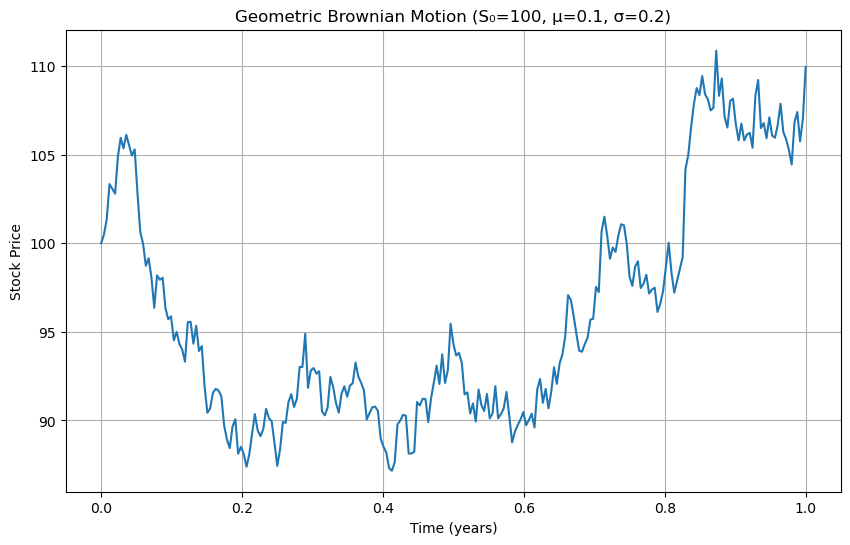

In [49]:
from matplotlib import pyplot as plt


def plot_gbm_path(S0=100, mu=0.1, sigma=0.2, T=1, N=252, random_seed=42):
    """
    Plot a single GBM path with given parameters.
    """
    t, S = gbm_direct(S0, mu, sigma, T, N, random_seed)
    
    plt.figure(figsize=(10, 6))
    plt.plot(t, S)
    plt.title(f'Geometric Brownian Motion (S₀={S0}, μ={mu}, σ={sigma})')
    plt.xlabel('Time (years)')
    plt.ylabel('Stock Price')
    plt.grid(True)
    plt.show()
    
    return t, S

# Simulate and plot a single path
t, S = plot_gbm_path()

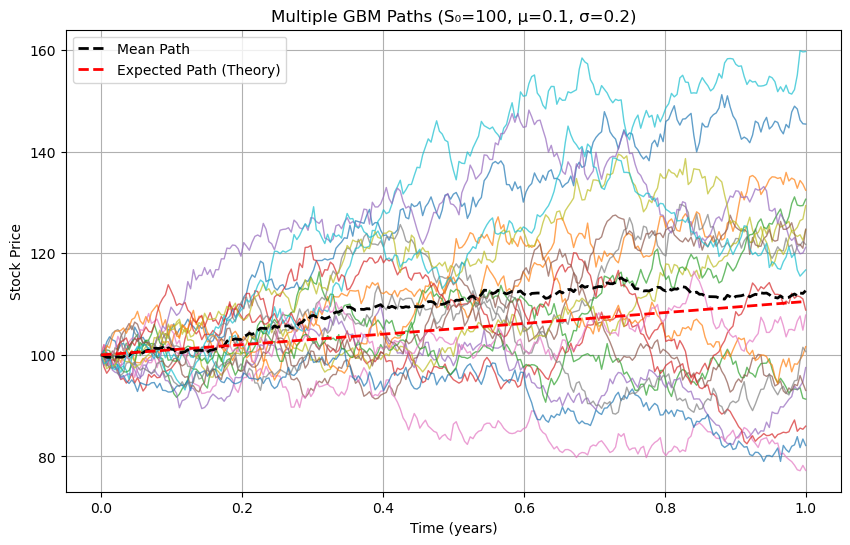

In [57]:
from matplotlib import pyplot as plt


def plot_multiple_gbm_paths(S0=100, mu=0.1, sigma=0.2, T=1, N=252, M=10, random_seed=42):
    """
    Plot multiple GBM paths with given parameters.
    """
    t, S = gbm_multiple_paths(S0, mu, sigma, T, N, M, random_seed)
    
    plt.figure(figsize=(10, 6))
    for i in range(M):
        plt.plot(t, S[:, i], alpha=0.7, linewidth=1)
    
    # Calculate and plot mean path
    mean_path = np.mean(S, axis=1)
    plt.plot(t, mean_path, 'k--', linewidth=2, label='Mean Path')
    
    # Calculate and plot expected path based on formula
    expected_path = S0 * np.exp(mu * t)
    plt.plot(t, expected_path, 'r--', linewidth=2, label='Expected Path (Theory)')
    
    plt.title(f'Multiple GBM Paths (S₀={S0}, μ={mu}, σ={sigma})')
    plt.xlabel('Time (years)')
    plt.ylabel('Stock Price')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    return t, S

# Simulate and plot multiple paths
t, S_multi = plot_multiple_gbm_paths(M=20)

## Effect of Parameters on GBM

Let's examine how changing the drift ($\mu$) and volatility ($\sigma$) parameters affects the GBM paths:

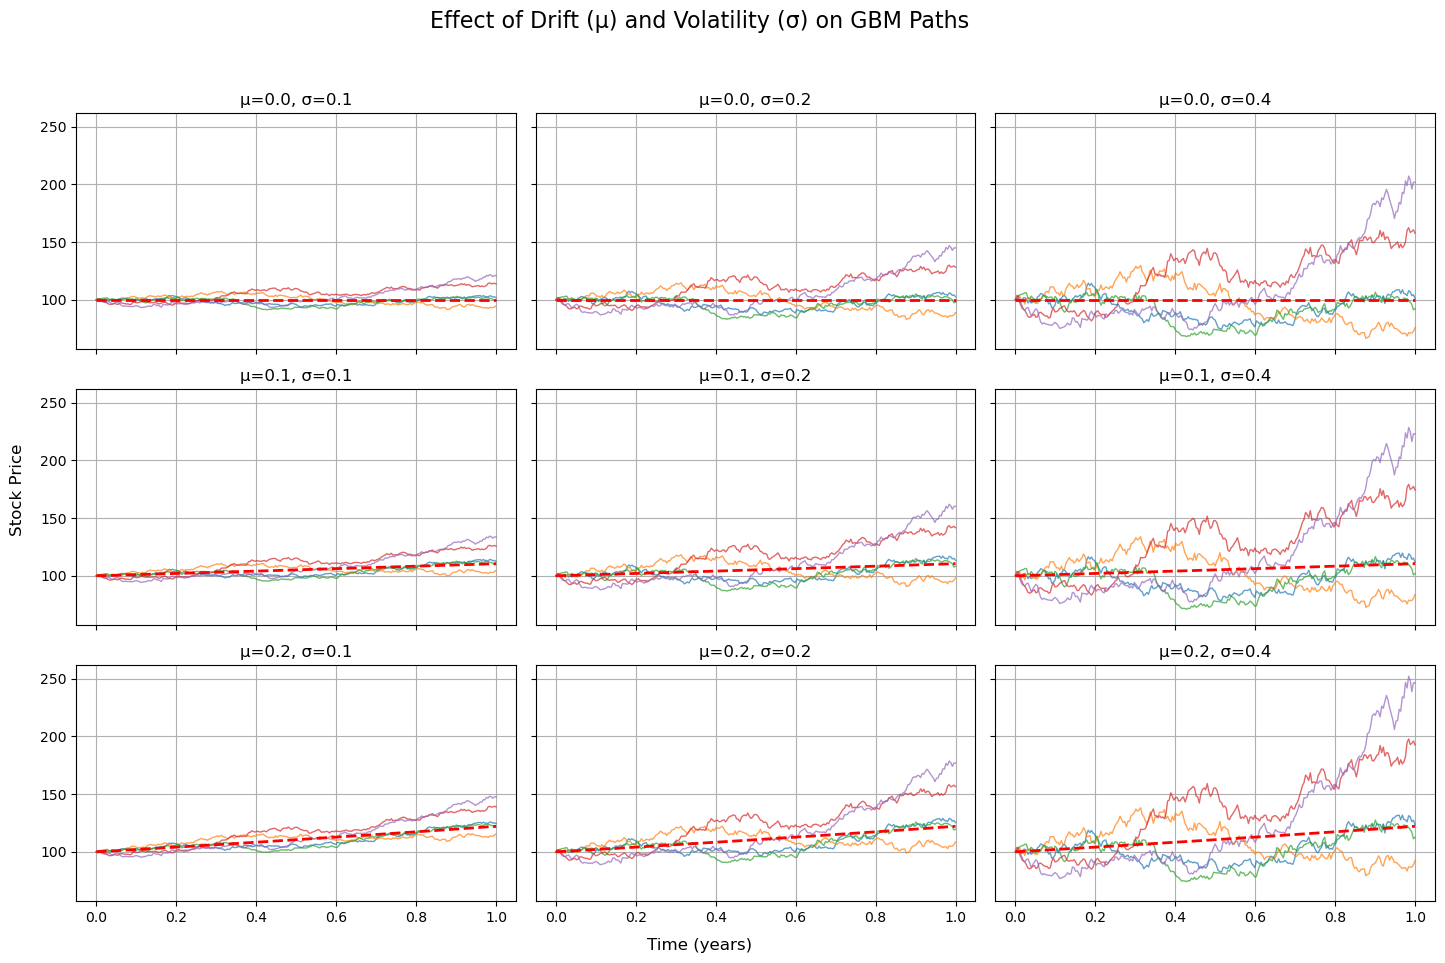

In [59]:
def plot_gbm_parameters_effect():
    """
    Plot multiple GBM paths with different parameter values to visualize their effects.
    """
    S0 = 100    # Initial stock price
    T = 1       # Time horizon in years
    N = 252     # Number of time steps (e.g., trading days in a year)
    M = 5       # Number of paths per parameter set
    
    # Define different parameter sets for drift and volatility
    mu_values = [0.0, 0.1, 0.2]
    sigma_values = [0.1, 0.2, 0.4]
    
    fig, axs = plt.subplots(len(mu_values), len(sigma_values), figsize=(15, 10), sharex=True, sharey=True)
    
    for i, mu in enumerate(mu_values):
        for j, sigma in enumerate(sigma_values):
            # Simulate multiple paths with current parameters
            t, S = gbm_multiple_paths(S0, mu, sigma, T, N, M, random_seed=42)
            
            # Plot paths on the corresponding subplot
            for m in range(M):
                axs[i, j].plot(t, S[:, m], alpha=0.7, linewidth=1)
            
            # Calculate and plot expected path
            expected_path = S0 * np.exp(mu * t)
            axs[i, j].plot(t, expected_path, 'r--', linewidth=2)
            
            axs[i, j].set_title(f'μ={mu}, σ={sigma}')
            axs[i, j].grid(True)
            
    # Add common labels
    fig.text(0.5, 0.04, 'Time (years)', ha='center', fontsize=12)
    fig.text(0.04, 0.5, 'Stock Price', va='center', rotation='vertical', fontsize=12)
    fig.suptitle('Effect of Drift (μ) and Volatility (σ) on GBM Paths', fontsize=16)
    
    plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
    plt.show()

# Plot the effect of parameters
plot_gbm_parameters_effect()

## Probability Distribution of GBM

The future stock price $S_t$ follows a lognormal distribution. Let's visualize this distribution at different time points:

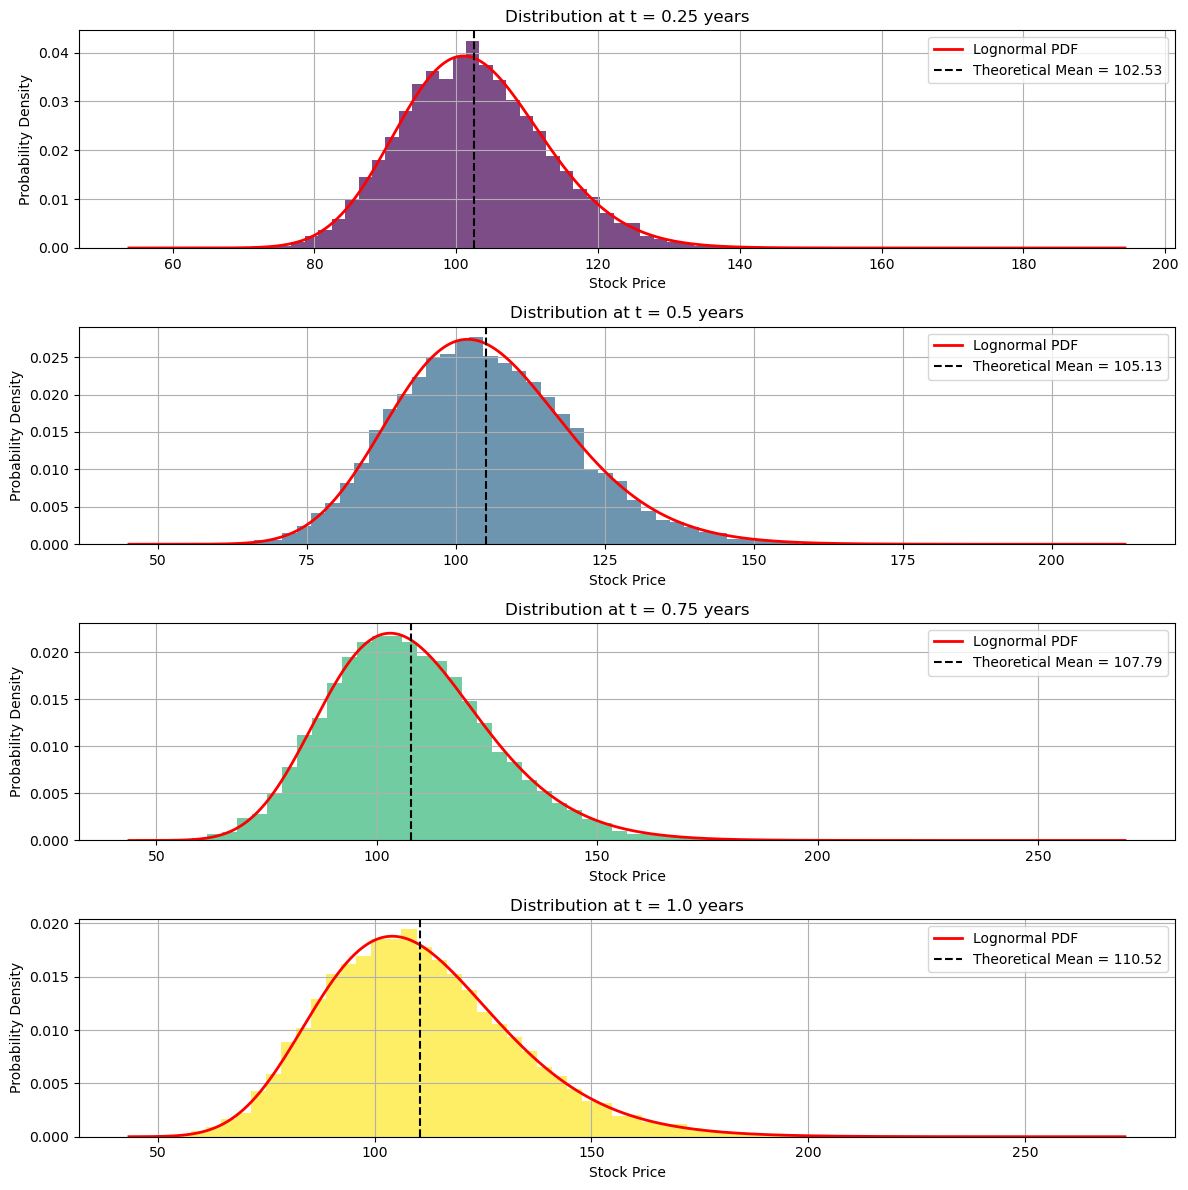

In [60]:
def plot_gbm_distribution(S0=100, mu=0.1, sigma=0.2, T=1, time_points=[0.25, 0.5, 0.75, 1.0], M=10000):
    """
    Plot the probability distribution of GBM at various time points.
    """
    N = 252  # Number of time steps
    
    # Simulate many paths to get a good distribution
    t, S = gbm_multiple_paths(S0, mu, sigma, T, N, M, random_seed=42)
    
    # Create time index map for easier lookup
    time_indices = {}
    for time_point in time_points:
        idx = np.abs(t - time_point).argmin()
        time_indices[time_point] = idx
    
    # Set up the plot
    fig, axs = plt.subplots(len(time_points), 1, figsize=(12, 3*len(time_points)))
    if len(time_points) == 1:
        axs = [axs]  # Make sure axs is a list for consistency
    
    # Color map for different time points
    colors = plt.cm.viridis(np.linspace(0, 1, len(time_points)))
    
    for i, (time_point, idx) in enumerate(time_indices.items()):
        # Get price distribution at this time point
        prices = S[idx, :]
        
        # Plot histogram
        axs[i].hist(prices, bins=50, density=True, alpha=0.7, color=colors[i])
        
        # Compute theoretical lognormal distribution
        # For lognormal distribution with mean and variance of log(price)
        mu_log = np.log(S0) + (mu - 0.5 * sigma**2) * time_point
        sigma_log = sigma * np.sqrt(time_point)
        
        x = np.linspace(max(0.01, np.min(prices) * 0.8), np.max(prices) * 1.2, 1000)
        pdf = (1 / (x * sigma_log * np.sqrt(2 * np.pi))) * \
              np.exp(-(np.log(x) - mu_log)**2 / (2 * sigma_log**2))
        
        axs[i].plot(x, pdf, 'r-', linewidth=2, label='Lognormal PDF')
        
        # Calculate theoretical mean and standard deviation
        theoretical_mean = S0 * np.exp(mu * time_point)
        theoretical_std = theoretical_mean * np.sqrt(np.exp(sigma**2 * time_point) - 1)
        
        # Add vertical lines for mean
        axs[i].axvline(x=theoretical_mean, color='k', linestyle='--', 
                      label=f'Theoretical Mean = {theoretical_mean:.2f}')
        
        # Add plot details
        axs[i].set_title(f'Distribution at t = {time_point} years')
        axs[i].set_xlabel('Stock Price')
        axs[i].set_ylabel('Probability Density')
        axs[i].grid(True)
        axs[i].legend()
    
    plt.tight_layout()
    plt.show()

# Plot distributions at different time points
plot_gbm_distribution()

## Applications of GBM

### Option Pricing

One of the most important applications of GBM is in option pricing. The Black-Scholes model assumes that stock prices follow GBM. Let's implement a simple European call option pricing function:


In [62]:
def black_scholes_call(S0, K, T, r, sigma):
    """
    Calculate the price of a European call option using the Black-Scholes formula.
    
    Parameters:
    S0 (float): Current stock price
    K (float): Strike price
    T (float): Time to maturity (in years)
    r (float): Risk-free interest rate (annualized)
    sigma (float): Volatility of the underlying asset (annualized)
    
    Returns:
    float: Call option price
    """
    d1 = (np.log(S0/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    call_price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    
    return call_price

# Example usage
S0 = 100    # Current stock price
K = 100     # Strike price
T = 1       # Time to maturity (in years)
r = 0.05    # Risk-free rate
sigma = 0.2 # Volatility

call_price = black_scholes_call(S0, K, T, r, sigma)
print(f"European Call Option Price: ${call_price:.2f}")

European Call Option Price: $10.45


### Monte Carlo Option Pricing

GBM can also be used in Monte Carlo simulations to price options that don't have analytical solutions:

In [63]:
def monte_carlo_call(S0, K, T, r, sigma, M=10000):
    """
    Price a European call option using Monte Carlo simulation with GBM.
    
    Parameters:
    S0 (float): Current stock price
    K (float): Strike price
    T (float): Time to maturity (in years)
    r (float): Risk-free interest rate (annualized)
    sigma (float): Volatility (annualized)
    M (int): Number of simulations
    
    Returns:
    float: Estimated call option price
    """
    # Note: For option pricing, we use the risk-neutral measure (mu = r)
    _, S = gbm_multiple_paths(S0, mu=r, sigma=sigma, T=T, N=1, M=M)
    
    # Calculate payoffs at maturity
    payoffs = np.maximum(S[-1] - K, 0)
    
    # Discount payoffs to present value
    option_price = np.exp(-r * T) * np.mean(payoffs)
    
    return option_price

# Compare Black-Scholes and Monte Carlo prices
mc_price = monte_carlo_call(S0, K, T, r, sigma)
bs_price = black_scholes_call(S0, K, T, r, sigma)

print(f"Black-Scholes Call Price: ${bs_price:.4f}")
print(f"Monte Carlo Call Price:   ${mc_price:.4f}")
print(f"Difference:               ${abs(bs_price - mc_price):.4f}")

Black-Scholes Call Price: $10.4506
Monte Carlo Call Price:   $10.3840
Difference:               $0.0666


## Conclusion

Geometric Brownian Motion is a fundamental stochastic process used to model stock prices and other financial assets. Its properties make it suitable for various financial modeling applications, particularly in option pricing.

Key takeaways from this notebook:

1. GBM models continuously compounded returns as normally distributed.
2. The drift parameter μ controls the average rate of return.
3. The volatility parameter σ controls the amount of randomness.
4. Stock prices following GBM are lognormally distributed.
5. GBM is the basis for the Black-Scholes option pricing model.

There are more sophisticated stochastic processes that address some limitations of GBM, such as stochastic volatility models, jump-diffusion models, and regime-switching models, which can capture more complex market dynamics.